<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet4/Praktikum1_Klasifikasi_SVM_dengan_Data_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

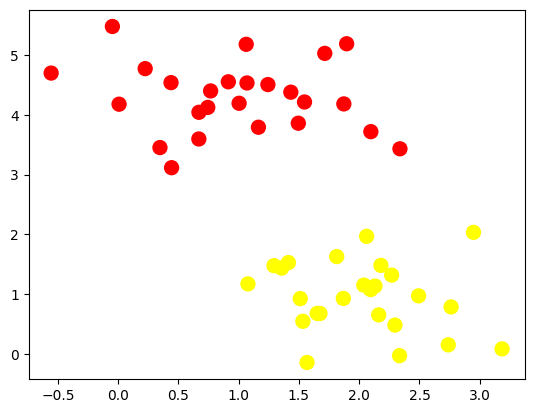

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')

# Penjelasan kode dari baris ke 2
# make_blobs digunakan untuk membuat data sintesis berupa kluster
# n_sample=50 berarti jumlah sample data 50
# centers=2 berarti terdapat 2 kluster
# ramdom_state digunakan agar data akan tetap sama jika dijalankan ulang
# cluster_std=0.60 berarti penyebaran data sekitar 0.6 dari pusat cluster(centroid)

# penjelasan kode dari baris ke 3
# plt.scatter merupakan fungsi dari matplotlib untuk membuat scatter plot
# X[:, 0], X[:, 1] menghasilkan koordinat x dan y
# c=y otomatis mewarnai titik berdasarkan kluster
# s=50 mengatur ukuran titik
# cmap='autumn' mengatur warna yang digunakan

In [5]:
print(X.shape)
print(y.shape)
print("\n")
print(X[:5])
print(y[:5])

# X akan menyimpan koordinat titik data yaitu (x, y)
# y akan menyimpan nilai cluster, disini hanya ada 2 kluster sehingga nilainya hanya akan ada 0 dan 1

(50, 2)
(50,)


[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
[1 1 0 0 1]


(-1.0, 3.5)

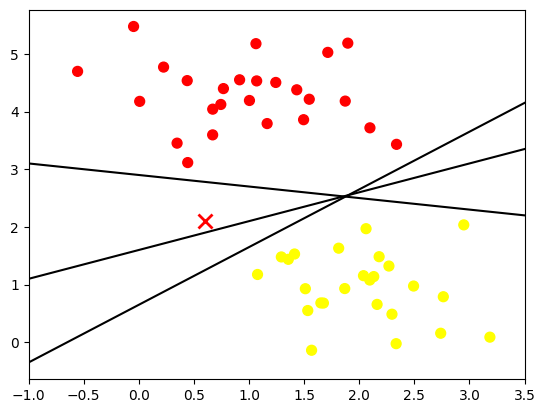

In [4]:
xfit = np.linspace(-1, 3.5, num=10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#Penjelasan kode baris ke 1
#np.linspace(-1, 3.5, num=10) digunakan untuk menentukan 10 titik dari rentang -1 sampai 3.5 jarak antar titik sama,
#jika tidak diberikan parameter num maka nilai defaultnya 50

#Penjelasan kode baris ke 3
# [0.6], [2.1] memberikan koordinat pada satu titik
# 'x' memberikan marker berbentuk x
# color='red' warna marker
# markeredgewidth=2 tebal garis pada marker
# markersize=10 ukuran marker

#Penjelasan baris ke 5
# m berarti kemiringan dan b berarti intersep(titik dimana garis memotong sumbu-y ketika nilai x=0)
# (1, 0.65) berarti m = 1, dan b = 0.65

#Penjelasan baris ke 6
#plt.plot untuk membuat garis
#(x.fit, m*xfit+b) menunjukan koordinat (x, y)
# -k untuk (-) berarti solid line dan k berarti garis berwarna hitam

#Penjelasan baris ke 8
#plt.xlim() mengatur batas sumbu-x dari -1 hingga 3.5, membatasi area yang terlihat pada plot.

In [6]:
print(xfit)

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5]


(-1.0, 3.5)

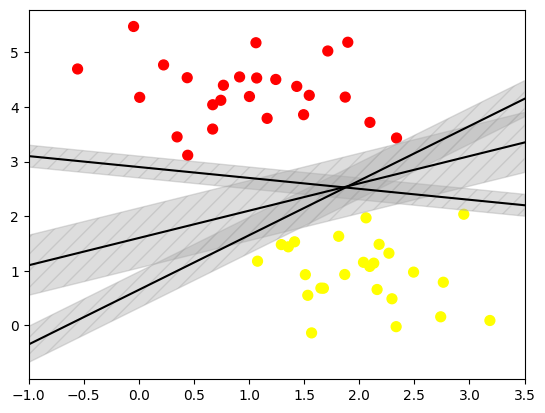

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4, hatch='//')


plt.xlim(-1, 3.5)

#Penjelasan kode
# kode sama seperti sebelumnya hanya saja ditambah plt.fill_beetween untuk mengarsir area diantara garis
# garis yang diarsir adalah antara (xfit, yfit-d) sampai (xfit, yfit+d)
# edgecolor='none' berarti menghilangkan garis tepi diarea yang diarsir
# alpha=0,4 berarti opacity atau transparansi sebanyak 40%

Penerapa fitting SVM

In [22]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [23]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

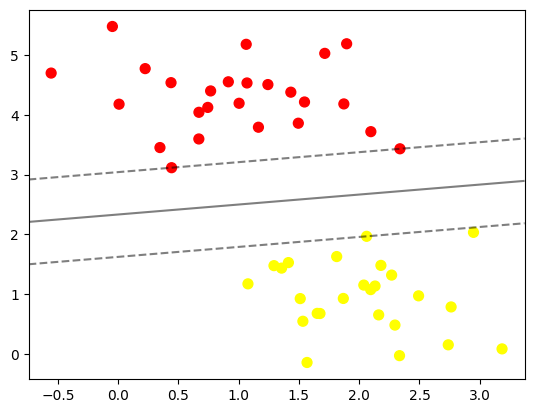

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)